

**Exploratory Data Analysis on Titanic dataset**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv("titanic.csv")
df.head() 

# dependent var - survived (to predict 0:died,1:survived)
# sibsp - count of sibling & spouse
# parch - count of parent & children

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Step 1: Missing data**

In [3]:
# option: 1
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

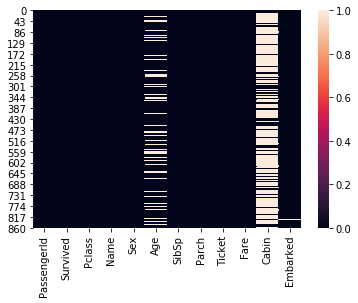

In [4]:
#option: 2
sns.heatmap(df.isna()) #black(i.e 0.0) means value is present, white(i.e 1.0) says presence of null value

**Step 2: Derive insights from data**

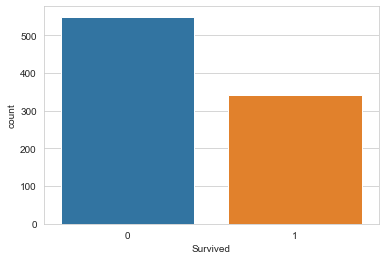

In [5]:
sns.set_style("whitegrid")
sns.countplot(df['Survived'])

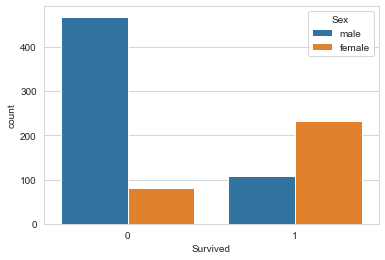

In [6]:
sns.set_style("whitegrid")
sns.countplot(df['Survived'],hue=df['Sex']) #hue will segregate male and female

Insights:
- We can see that male(blue) passenger have died(0) more.
- And female(orange) passenger survived(1) more.

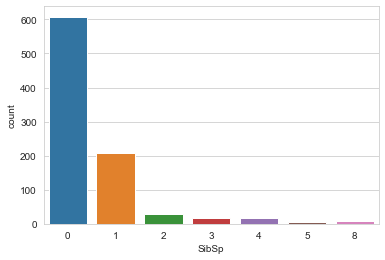

In [7]:
sns.set_style("whitegrid")
sns.countplot(df['SibSp'])

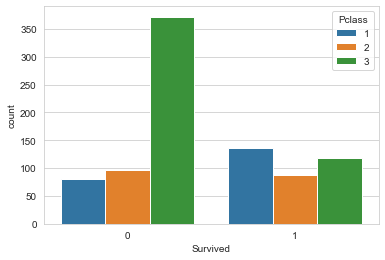

In [8]:
sns.set_style("whitegrid")
sns.countplot(df['Survived'],hue=df['Pclass']) #hue will segregate passanger class 1,2 & 3

Insights:
- We can see that 3rd class(green) passenger have died(0) more.
- And 1st class(blue) passenger survived(1) more.

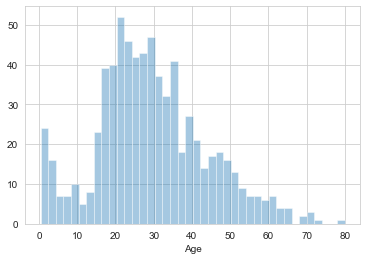

In [9]:
sns.distplot(df['Age'].dropna(),kde=False,bins=40) # kde=F will give count else it'll give gaussian kernel density estimate.

Insights:
- People with age b/w 20-30 were travelling more.

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([24., 16.,  7.,  7., 10.,  5.,  8., 23., 39., 40., 52., 46., 42.,
        43., 47., 37., 32., 41., 18., 27., 21., 14., 17., 18., 16., 13.,
         9.,  7.,  7.,  6.,  7.,  4.,  4.,  0.,  2.,  3.,  1.,  0.,  0.,
         1.]),
 array([ 0.42  ,  2.4095,  4.399 ,  6.3885,  8.378 , 10.3675, 12.357 ,
        14.3465, 16.336 , 18.3255, 20.315 , 22.3045, 24.294 , 26.2835,
        28.273 , 30.2625, 32.252 , 34.2415, 36.231 , 38.2205, 40.21  ,
        42.1995, 44.189 , 46.1785, 48.168 , 50.1575, 52.147 , 54.1365,
        56.126 , 58.1155, 60.105 , 62.0945, 64.084 , 66.0735, 68.063 ,
        70.0525, 72.042 , 74.0315, 76.021 , 78.0105, 80.    ]),
 <a list of 40 Patch objects>)

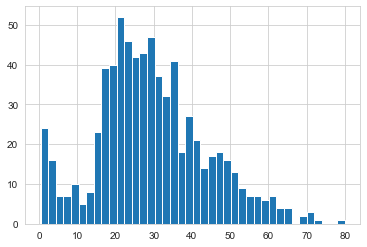

In [10]:
#or

plt.hist(df['Age'],bins=40)

**Step 3: Remove null values**

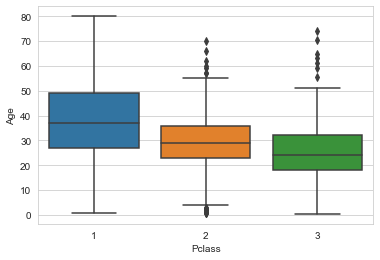

In [11]:
sns.boxplot(x=df['Pclass'],y=df['Age'])

In [12]:
# Using user defined function

def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37 # mean values from boxplot
        elif Pclass==2:
            return 29
        else: 
            return 24
    else:
        return Age

In [13]:
df['Age']=df[['Age','Pclass']].apply(input_age,axis=1) #axis=1 states column, axis=0 states row

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# Cabin has 687 missing values, we'll drop that column

df.drop('Cabin',axis=1,inplace=True)

In [16]:
# Embarked has only 2 missing values so we can drop those rows

df.dropna(inplace=True)

**Step 4: Dropping unnecessary attributes**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [18]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

**Step 5: Converting categorical to numeric**

In [19]:
df['Sex']=pd.get_dummies(df['Sex'],drop_first=True) #drop_first will drop 1st category of sex attribute 
# which means whenever 0 occurs it represents 1st category of that attribute.

In [20]:
emb=pd.get_dummies(df['Embarked'],drop_first=True) 
#emb is also a DF so it needs to be concatenated, cannont assign it as previous step

In [21]:
df=pd.concat([df,emb],axis=1)

In [22]:
df.drop('Embarked',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,1




**Apply Logistic Regression**

**Step 5: Train Test Split**

In [29]:
X=df.drop('Survived',axis=1)
Y=df['Survived']

In [35]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

**Step 6: Training model**

In [36]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(xtrain,ytrain)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

**Step 7: Prediction**

In [38]:
prediction=model.predict(xtest)

**Step 8: Model Evaluation**

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score

confusion_matrix(ytest,prediction)

array([[117,  17],
       [ 33,  56]], dtype=int64)

In [42]:
accuracy_score(ytest,prediction)

0.7757847533632287